## 10 Images Segmentation without Augmentation.

In [1]:
!nvidia-smi

Thu May  4 23:03:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:

import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8 Model - (Instance Segmentation)

In [3]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

### Downloading our Custom Dataset from Roboflow.

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mlOW9MXyMKSp8qJPp7wy")
project = rf.workspace("tropical-fishes").project("baseline_10_per_cat")
dataset = project.version(1).download("yolov8")



/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=8fc49d46b81407b9aaa962ad8766820b6ed602acf7949db6f40edbce182abc9d
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstal

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.28, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Baseline_10_per_cat-1 in yolov8:: 100%|██████████| 209/209 [00:00<00:00, 2300.76it/s]


### Training on Custom Dataset

In [5]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8l-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=640

/content
100% 88.1M/88.1M [00:00<00:00, 157MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8l-seg.pt, data=/content/datasets/Baseline_10_per_cat-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False,

In [6]:
!ls {HOME}/runs/segment/train/

args.yaml					    train_batch0.jpg
events.out.tfevents.1683241470.6e34bce3cabf.2118.0  train_batch1.jpg
results.csv					    train_batch2.jpg
results.png					    weights


In [7]:
from IPython.display import display, Image

%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


FileNotFoundError: ignored

/content


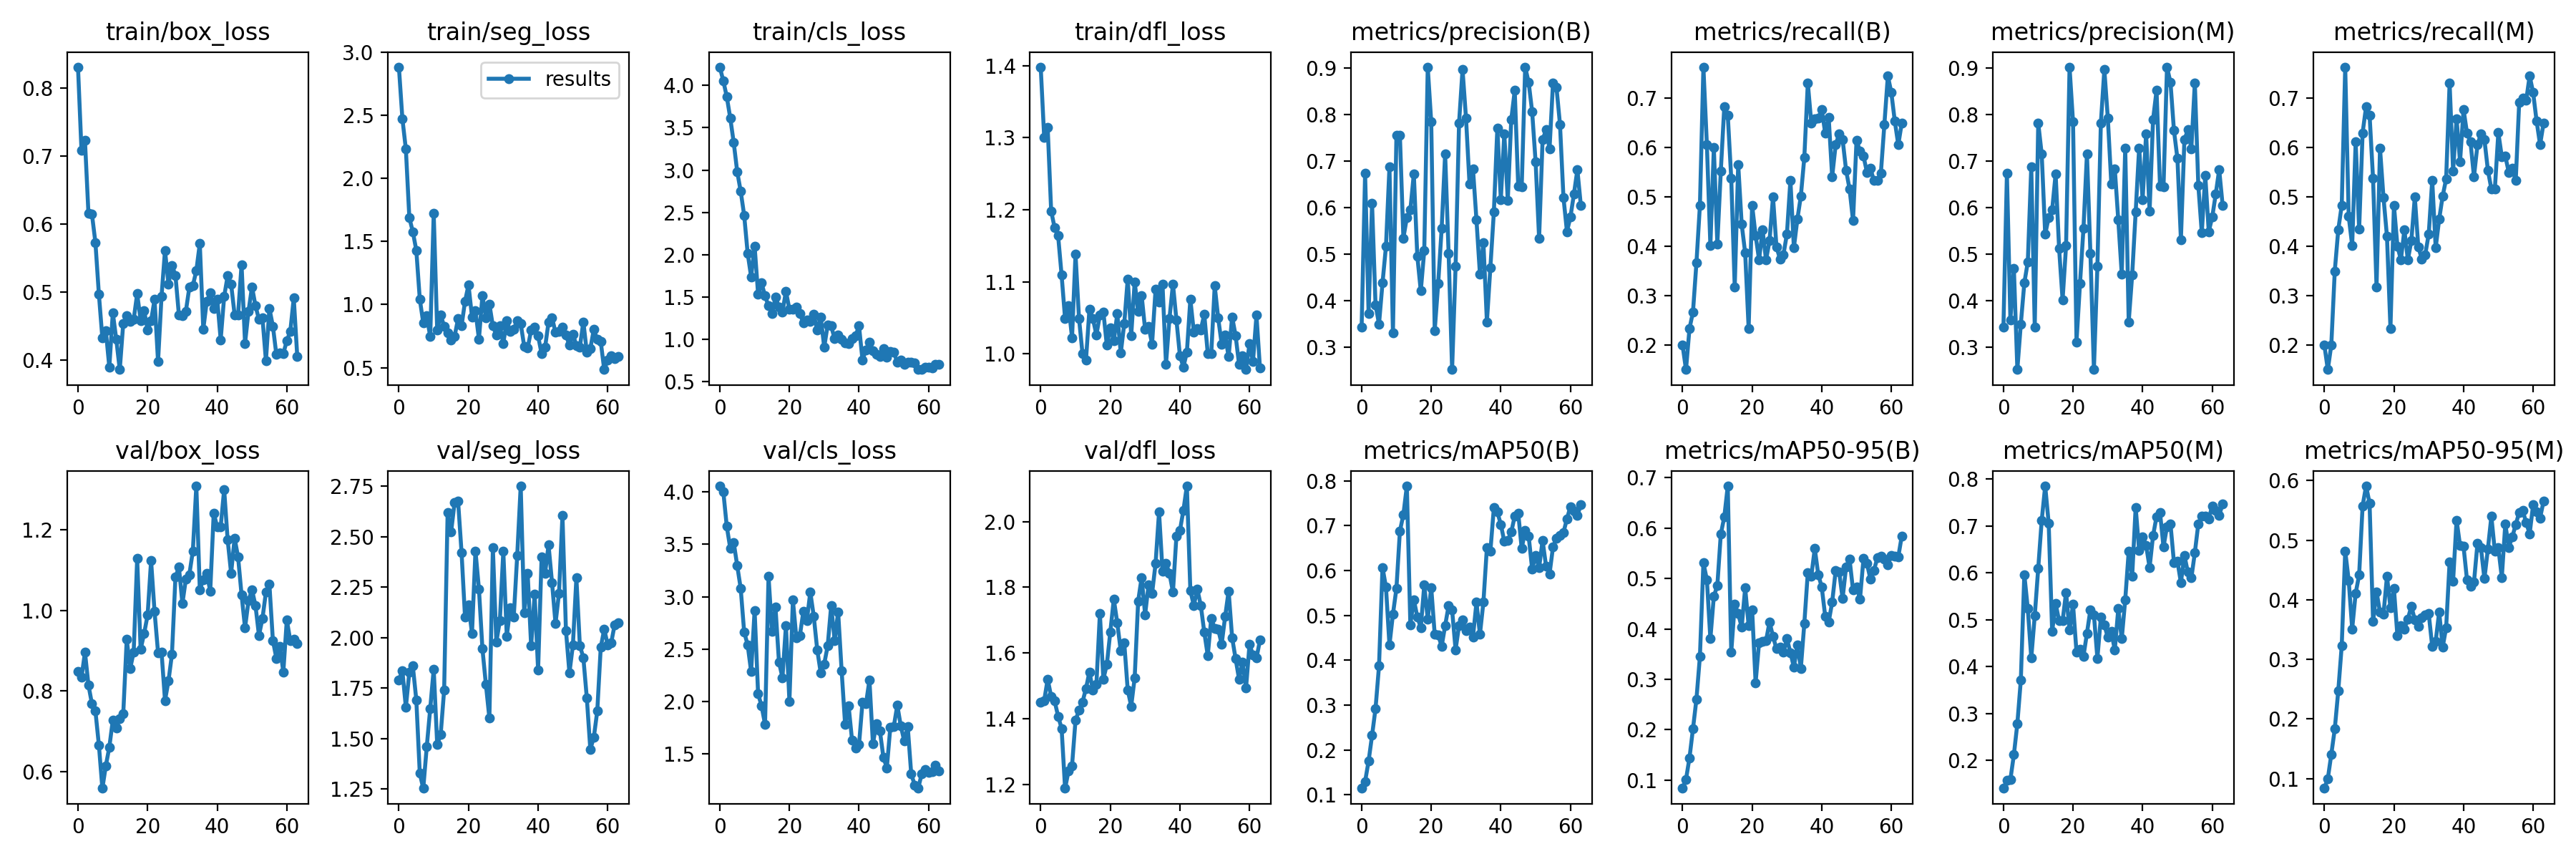

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

/content


FileNotFoundError: ignored

### Validate Custom Model

In [10]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-05-04 23:22:57.839411: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 23:22:59.260774: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45919598 parameters, 0 gradients, 220.2 GFLOPs
val: Scanning /content/datasets/Baseline_10_per_cat-1/valid/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100% 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.05s/it]
                   all         19         21      0.578      0.666     

### Inference with Custom Model

In [11]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
2023-05-04 23:23:17.035449: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 23:23:17.923751: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8l-seg summary (fused): 295 layers, 45919598 parameters, 0 gradients, 220.2 GFLOPs

image 1/11 /content/datasets/Baseline_10_per_cat-1/test/images/186_jpg.rf.6222c0299246181b379feef3bd81372b.jpg: 640x640 1 Clarks-anemonefish, 76.4ms
image 2/11 /content/datasets/Baseline_10_per_cat-1/test/images/204_jpg.rf.7e793b52363b39733f6391a53a90f5c1.jpg: 640x640 1 Blackspot-Snapper, 57.1ms
image 3/11 /content/datasets/Baseline_10_per_cat-1/test/images/235_jpg.rf.a6385e9a

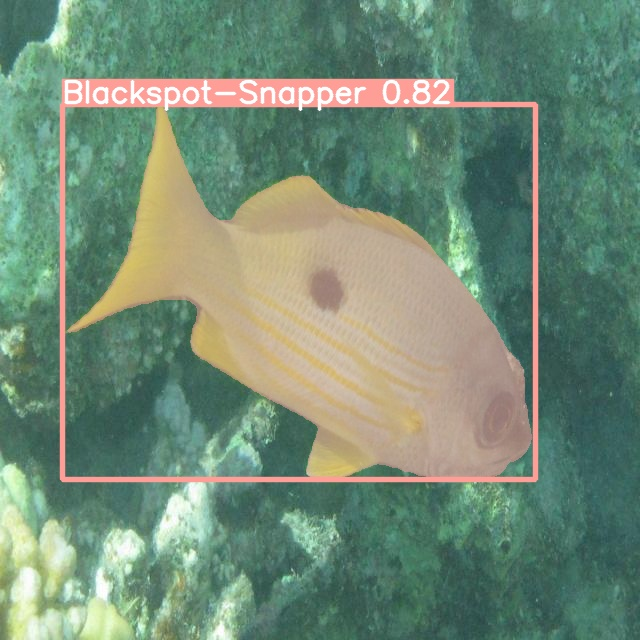

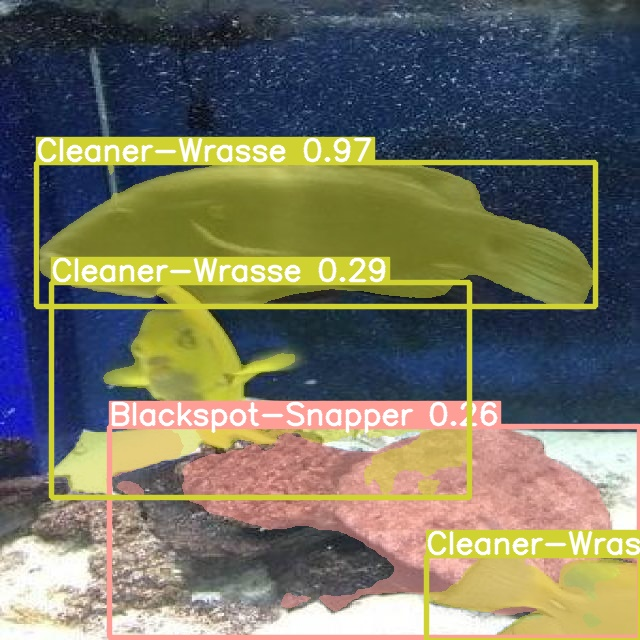

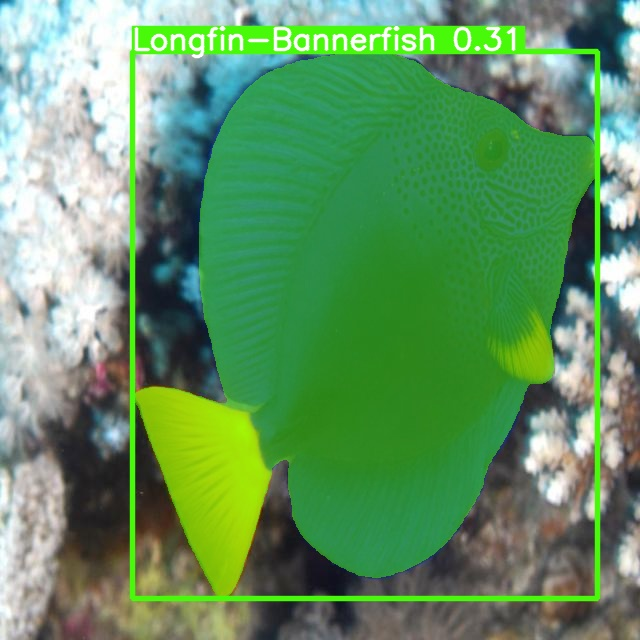

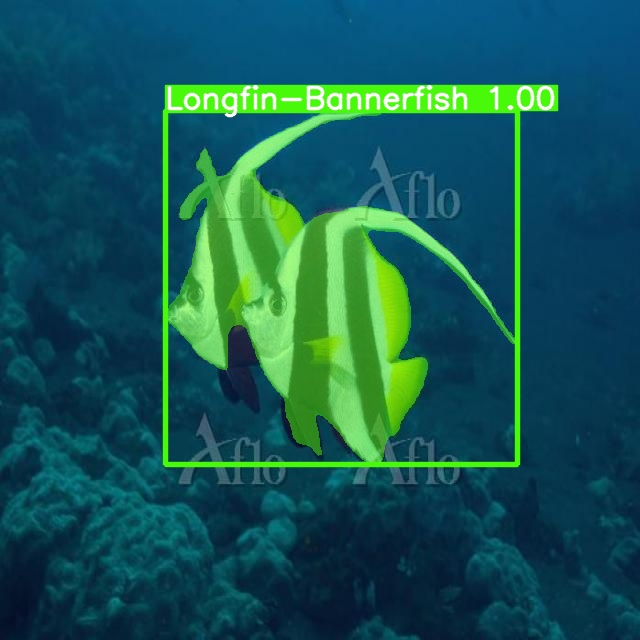

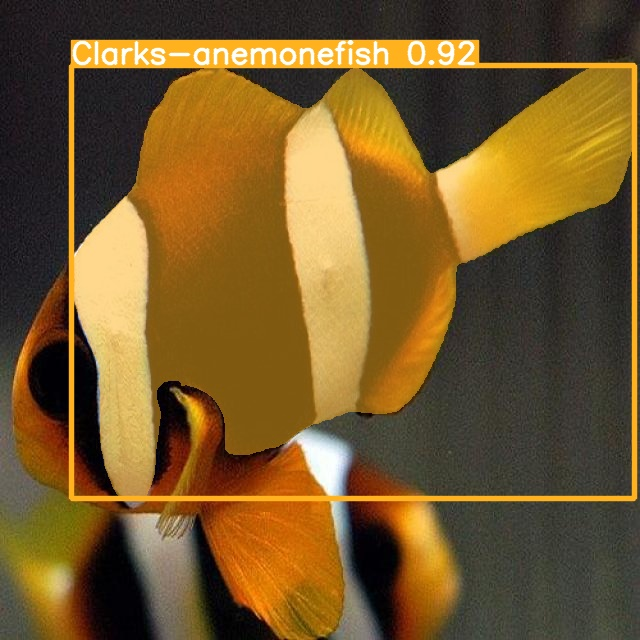

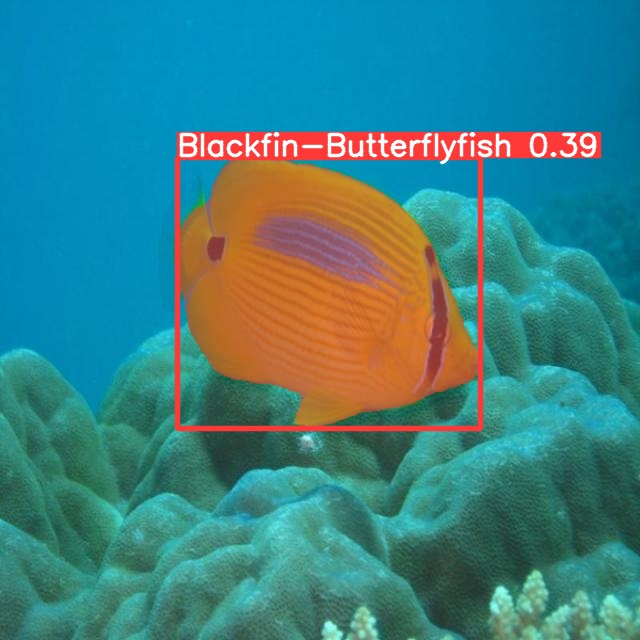

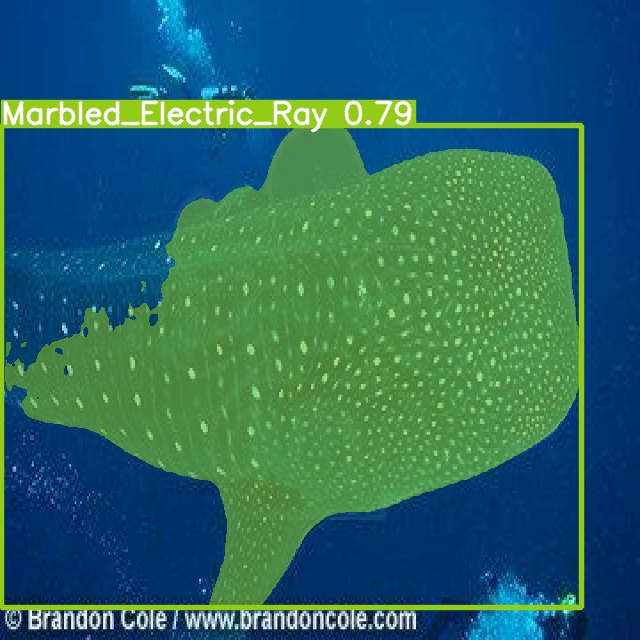

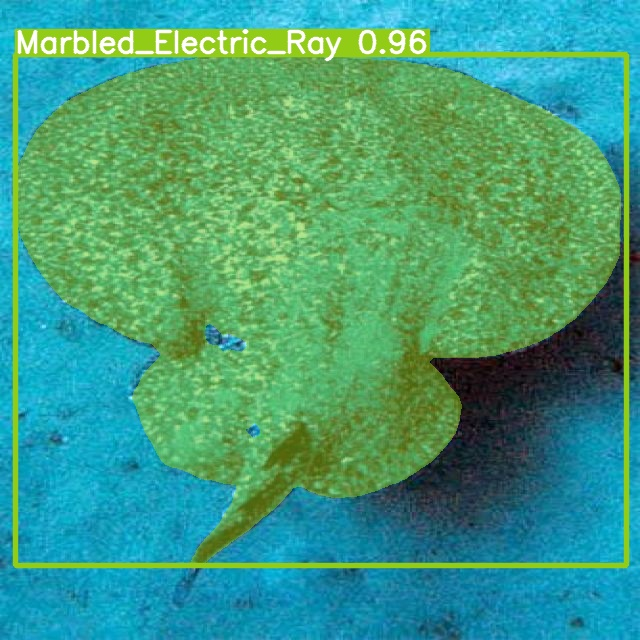

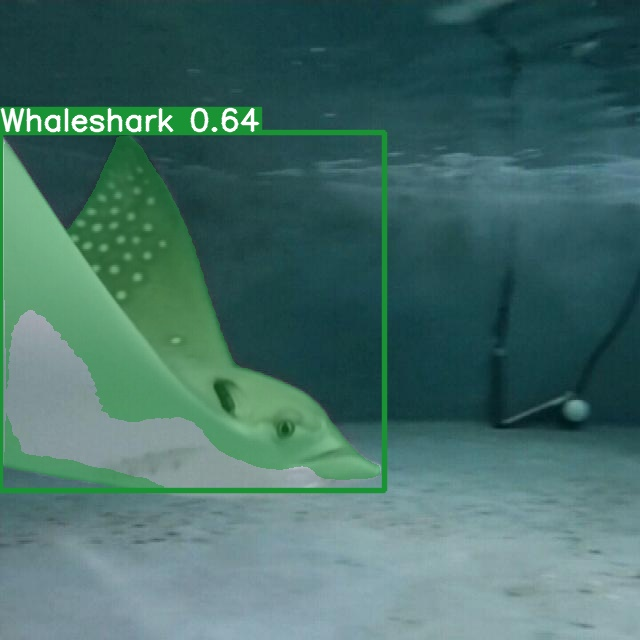

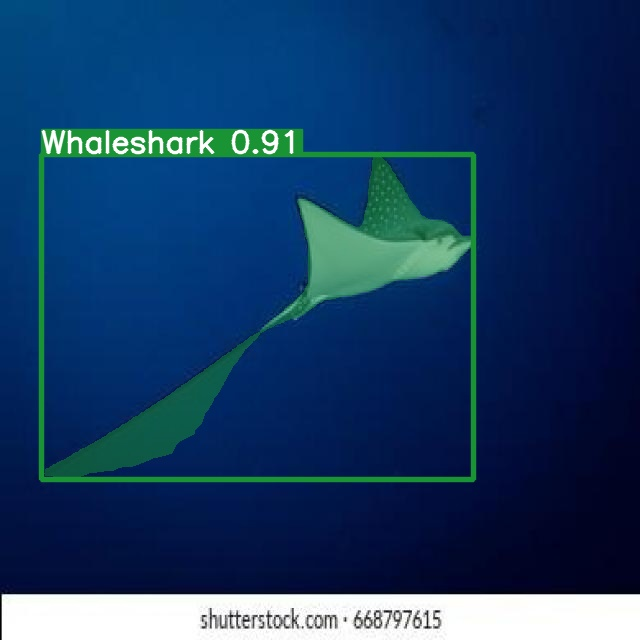

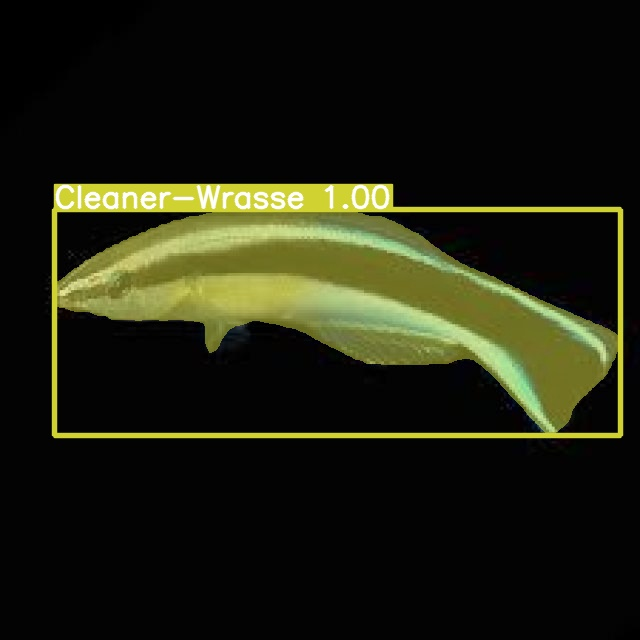

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:20]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:20]:
      display(Image(filename=image_path, height=600))
      print("\n")